### Konsep Dasar
Konsep dasar algoritma ini adalah mengubah dataset menjadi aturan aturan keputusan yang akan menyerupai suatu pohon. Suatu Decision Tree terdiri dari node yang melambangkan feature/atribut, branch yang melambangkan decision rule, dan leaf yang melambangkan outcome.

### Algoritma

1. ID3 (Iterative Dichotomiser 3)
2. C4.5
3. CART (Classification And Regression Tree)

### Entropy
adalah suatu parameter yang mengukur tingkat keberagaman (heterogentias) dari suatu kumpulan data. 

Semakin heterogen, nilai entropy akan semakin besar. Jika Entropy = 0, aritnya dia tidak beragam dan Subset tersebut terklasifikasi secara sempurna. Atau dapat dikatakan bahwa subset tersebut hanya dimiliki oleh sampel positive saja atau sampel negatif saja. Atau dapat dikatakan juga bahwa subset yang memiliki nilai Entropy = 0, dia tidak perlu di split.

Keadaan Entropy = 0 ini disebut dengan keadan pure set. Formula dari Entropy adalah

Entropy = $-\Sigma p(x)logp(x)$

dimana p(x) adalah proporsi untuk setiap kelas

## Information Gain
Information Gain memberitahu kita seberapa banyak informasi yang diberikan feature tentang kelasnya. Juga Mengukur efektifitas suatu atribut dalam mengklasifikasikan data. Information Gain inilah yang akan menjadi kunci terbentuknya Decision Tree. Variabel yang mempunyai Information Gain yang tertinggi akan menjadi variabel yang berada di paling atas (di split terlebih dahulu). 

Formula dari Information Gain adalah

IG = Entropy(Parent) - [weighted_average]*entropy(children)

### Kelebihan Decision Tree

1. Simple to understand and to interpret. Trees can be visualised.

2. Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.

3. The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

4. Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.

5. Able to handle multi-output problems.

6. Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

7. Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

8. Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

### Kekurangan Decision Tree

1. Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

2. Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

3. The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

4. There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

5. Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

### Load Package

In [1]:
import pandas as pd 
from datetime import datetime, timedelta, date
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# 1. Data Preprocessing
Dataset yang digunakan berasal dari kaggle.com yaitu https://www.kaggle.com/uciml/pima-indians-diabetes-database. Variabel yang digunakan adalah

- Pregnancies : Number of times pregnant
- Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure : Diastolic blood pressure (mm Hg)
- SkinThickness :Triceps skin fold thickness (mm)
- Insulin : 2-Hour serum insulin (mu U/ml)
- BMI : Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction : Diabetes pedigree function
- Age : Age (years)
- Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0

## 1.1 Import Datasets

In [4]:
diabetes = pd.read_csv('diabetes.csv')

In [5]:
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.isnull().count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [8]:
feature_cols = ['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = diabetes[feature_cols]
y = diabetes.Outcome

## 1.2 Split datasets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# 2. Modeling

In [10]:
fit = DecisionTreeClassifier().fit(X_train, y_train.values.ravel())
y_pred = fit.predict(X_test)

## 2.2 Evaluation Model
Tahapan ini berfungsi untuk mengetahui apakah model yang digunakan layak digunakan alat prediksi. Beberapa cara yang dapat dijadikan evaluasi model
1. Akurasi (> 80%)
2. Presisi (> 80%)
3. F1-Score (> 80%)
4. Recall (> 80%)

In [11]:
confusion_matriks = confusion_matrix(y_test, y_pred)
classification_reports = classification_report(y_test, y_pred)

In [12]:
print(confusion_matriks)

[[106  45]
 [ 27  53]]


In [13]:
print(classification_reports)

              precision    recall  f1-score   support

           0       0.80      0.70      0.75       151
           1       0.54      0.66      0.60        80

    accuracy                           0.69       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.69      0.69       231



In [14]:
"""
Variabel mana yang paling penting dapat dilihat di bagian ini
"""
df_importance = pd.DataFrame(fit.feature_importances_).T
df_importance.columns = feature_cols
df_importance2 = df_importance.T.reset_index()
df_importance2.columns = ['variabel','relatif_importance']
df_importance2 = df_importance2.sort_values('relatif_importance',ascending=False)
df_importance2

variabel  relatif_importance
4                   Glucose            0.345155
2                       BMI            0.204731
3                       Age            0.162819
5             BloodPressure            0.095825
6  DiabetesPedigreeFunction            0.091293
0               Pregnancies            0.056722
1                   Insulin            0.043454

<BarContainer object of 7 artists>

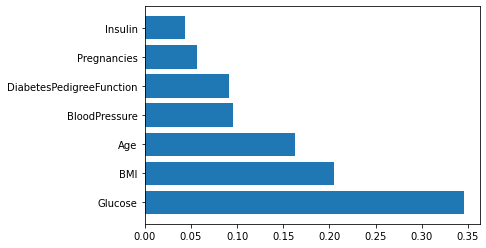

In [15]:
plt.barh(df_importance2['variabel'],df_importance2['relatif_importance'])

In [17]:
"""
Grafik di bawah ini berfungsi untuk mengetahui rules/aturan yang membuat suatu customer renewal
atau tidak renewal.
"""
fn= feature_cols
cn= ['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=3000)
tree.plot_tree(fit,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('treeplot.png')

# Referensi
- https://www.datacamp.com/community/tutorials/decision-tree-classification-python
- https://scikit-learn.org/stable/modules/tree.html
- https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- http://dataaspirant.com/2017/01/30/how-decision-tree-algorithm-works/
- https://medium.com/coinmonks/what-is-entropy-and-why-information-gain-is-matter-4e85d46d2f01